In [ ]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zonas_zmvm="https://raw.githubusercontent.com/BettySanchez7/Proyecto_AnalisisDatosConPython/main/map.json"

In [ ]:
url_1="https://raw.githubusercontent.com/BettySanchez7/Proyecto_AnalisisDatosConPython/main/datos/datos_limpios_imeca/CO.csv"
url_2 = "https://raw.githubusercontent.com/BettySanchez7/Proyecto_AnalisisDatosConPython/main/datos/datos_limpios_imeca/NO2.csv"
url_3 = "https://raw.githubusercontent.com/BettySanchez7/Proyecto_AnalisisDatosConPython/main/datos/datos_limpios_imeca/O3.csv"
url_4 = "https://raw.githubusercontent.com/BettySanchez7/Proyecto_AnalisisDatosConPython/main/datos/datos_limpios_imeca/SO2.csv"
url_5 = "https://raw.githubusercontent.com/BettySanchez7/Proyecto_AnalisisDatosConPython/main/datos/datos_limpios_imeca/PM10.csv"

In [ ]:
df_Co=pd.read_csv(url_1)
df_No2 = pd.read_csv(url_2)
df_O3 = pd.read_csv(url_3)
df_So2 = pd.read_csv(url_4)
df_Pm10 = pd.read_csv(url_5)

Variable catagórica:
El índice metropolitano de calidad de Aire califica los puntajes de calidad de aire con un código de colores  que indica un rango de valor entre desde cero en adelante.
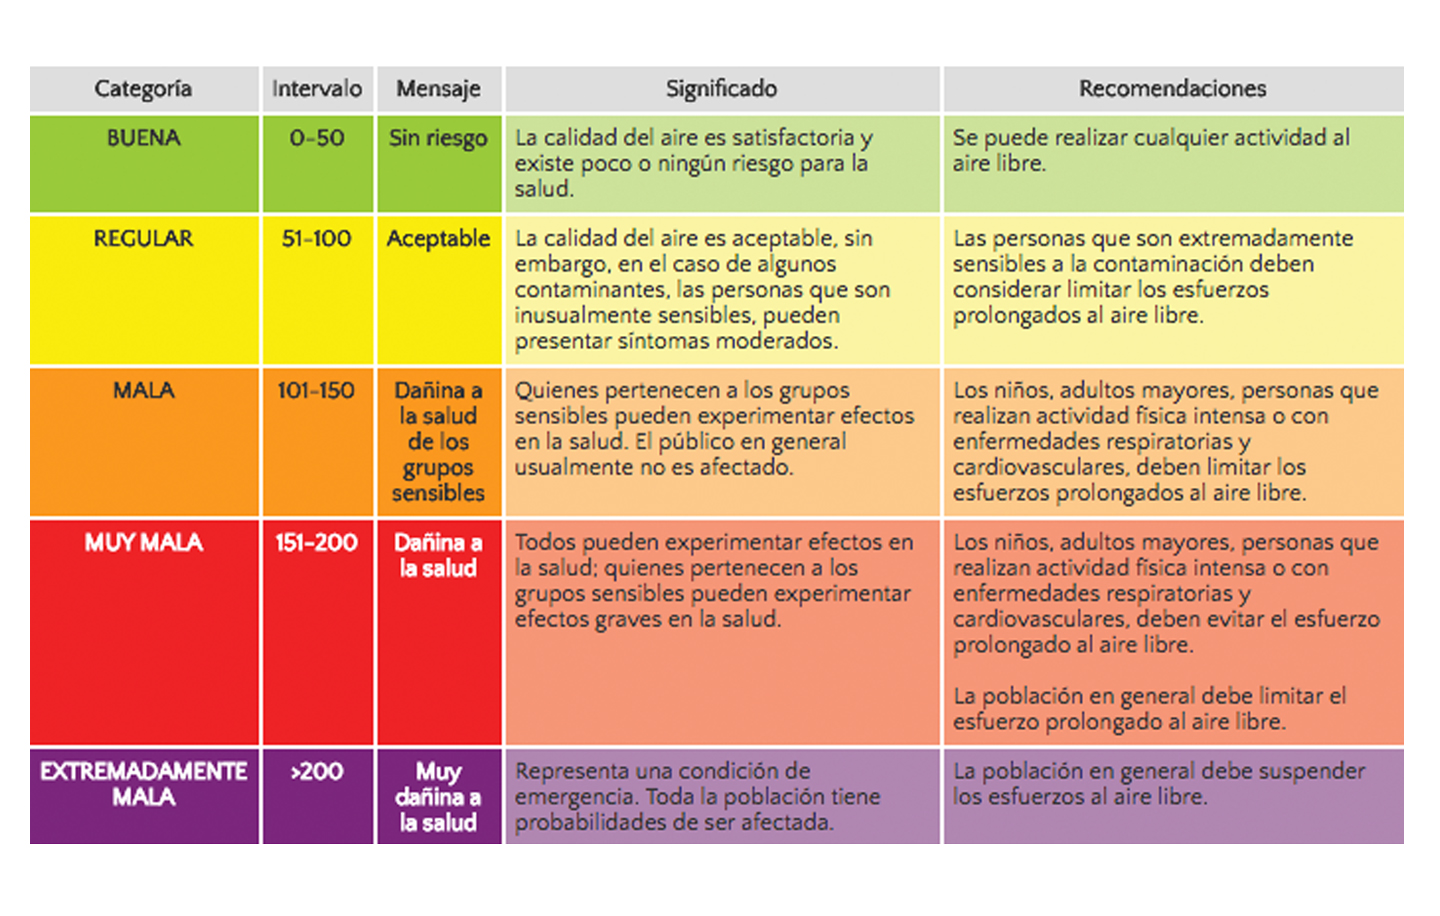

Analizaremos los datos para el año 2020 para observar cuantos días del año se tuvo un valor de calidad de aire u otro. Además de trabajar con un promedio de medición diario.

In [ ]:
#Filtrado por año
df_Co=df_Co[df_Co['fecha']>='2020-01-01']
df_No2=df_No2[df_No2['fecha']>='2020-01-01']
df_O3=df_O3[df_O3['fecha']>='2020-01-01']
df_So2=df_So2[df_So2['fecha']>='2020-01-01']
df_Pm10=df_Pm10[df_Pm10['fecha']>='2020-01-01']

In [ ]:
#Fijamos los decimales a 2, para acortar los números
df_Co=round(df_Co.groupby('fecha').mean(),2)
df_No2=round(df_No2.groupby('fecha').mean(),2)
df_O3=round(df_O3.groupby('fecha').mean(),2)
df_So2=round(df_So2.groupby('fecha').mean(),2)
df_Pm10=round(df_Pm10.groupby('fecha').mean(),2)

In [ ]:
#Agregamos una columns de categoría para poder unir después todas las tablas
df_Co['Categoría']='CO'
df_No2['Categoría']='No2'
df_O3['Categoría']='O3'
df_So2['Categoría']='So2'
df_Pm10['Categoría']='Pm10'

In [ ]:
lista = [df_Co,df_No2,df_O3,df_So2,df_Pm10]

In [ ]:
#renombramos las columnas
for i in lista:
  i.columns = ['hora','noreste','suroeste','noroeste','sureste','centro','categoria']

Juntamos toda la información en 1 sola tabla para manejo más fácil de la información y agregamos la categoría para tener un separación de los valores.

In [ ]:
#unimos todos los DataFrames
df_all = pd.concat(lista)
df_all

,hora,noreste,suroeste,noroeste,sureste,centro,categoria
fecha,,,,,,,
2020-01-01,12.5,9.38,4.21,9.71,6.08,6.75,CO
2020-01-02,12.5,8.24,5.54,5.90,5.77,7.47,CO
2020-01-03,12.5,9.12,3.83,6.12,5.46,5.75,CO
2020-01-04,12.5,5.86,4.17,5.23,5.39,5.27,CO
2020-01-05,12.5,5.86,3.88,5.06,5.44,5.52,CO
...,...,...,...,...,...,...,...
2020-12-27,12.5,82.62,36.79,59.79,70.58,60.88,Pm10
2020-12-28,12.5,87.75,31.50,74.88,69.00,59.33,Pm10
2020-12-29,12.5,113.04,44.08,97.96,89.75,92.62,Pm10


Los datos IMECA, nos proporconan valores numéricos, pero el mismo índice como se pudo ver antes, tienen una escala cualitativa, para hacer más sencillo su forma de entender. Tomando esa tabla de valores cualitativos, convertiremos nuestros datos numéricos con el fin de tener descripción enl lugar de números.

In [ ]:
#La ZMVM esta conformada por 5 zonas, las cuales son:
zonas = ['noreste','suroeste','noroeste','sureste','centro']

In [ ]:
#Convertimos los datos numéricos agregando su índice correspondiente
for i in zonas:
  df_all.loc[df_all[i] <=50, f'cat_{i}'] = 'Bueno'
  df_all.loc[(df_all[i] >50) & (df_all[i] <=100), f'cat_{i}'] = 'Regular'
  df_all.loc[(df_all[i] >100) & (df_all[i] <=150), f'cat_{i}'] = 'Mala'
  df_all.loc[(df_all[i] >150) & (df_all[i] <=200), f'cat_{i}'] = 'Muy mala'
  df_all.loc[(df_all[i] >200), f'cat_{i}'] = 'Extremadamente mala'

In [ ]:
df_all

,hora,noreste,suroeste,noroeste,sureste,centro,categoria,cat_noreste,cat_suroeste,cat_noroeste,cat_sureste,cat_centro
fecha,,,,,,,,,,,,
2020-01-01,12.5,9.38,4.21,9.71,6.08,6.75,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-02,12.5,8.24,5.54,5.90,5.77,7.47,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-03,12.5,9.12,3.83,6.12,5.46,5.75,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-04,12.5,5.86,4.17,5.23,5.39,5.27,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-05,12.5,5.86,3.88,5.06,5.44,5.52,CO,Bueno,Bueno,Bueno,Bueno,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,12.5,82.62,36.79,59.79,70.58,60.88,Pm10,Regular,Bueno,Regular,Regular,Regular
2020-12-28,12.5,87.75,31.50,74.88,69.00,59.33,Pm10,Regular,Bueno,Regular,Regular,Regular
2020-12-29,12.5,113.04,44.08,97.96,89.75,92.62,Pm10,Mala,Bueno,Regular,Regular,Regular


In [ ]:
#Seleccionamos solo las columnas con las descripciones de índice para trabajar
df_all_cat = df_all.iloc[:,[6,7,8,9,10,11]]
df_all_cat.columns = ['categoria']+zonas
df_all_cat

,categoria,noreste,suroeste,noroeste,sureste,centro
fecha,,,,,,
2020-01-01,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-02,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-03,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-04,CO,Bueno,Bueno,Bueno,Bueno,Bueno
2020-01-05,CO,Bueno,Bueno,Bueno,Bueno,Bueno
...,...,...,...,...,...,...
2020-12-27,Pm10,Regular,Bueno,Regular,Regular,Regular
2020-12-28,Pm10,Regular,Bueno,Regular,Regular,Regular
2020-12-29,Pm10,Mala,Bueno,Regular,Regular,Regular


Al tratarse de variables categóricas, se puede trabajar por medio de crosstab

In [ ]:
cross_ce = pd.crosstab(df_all_cat['categoria'],df_all_cat['centro'])
cross_so = pd.crosstab(df_all_cat['categoria'],df_all_cat['suroeste'])
cross_se = pd.crosstab(df_all_cat['categoria'],df_all_cat['sureste'])
cross_no = pd.crosstab(df_all_cat['categoria'],df_all_cat['noroeste'])
cross_ne = pd.crosstab(df_all_cat['categoria'],df_all_cat['noreste'])

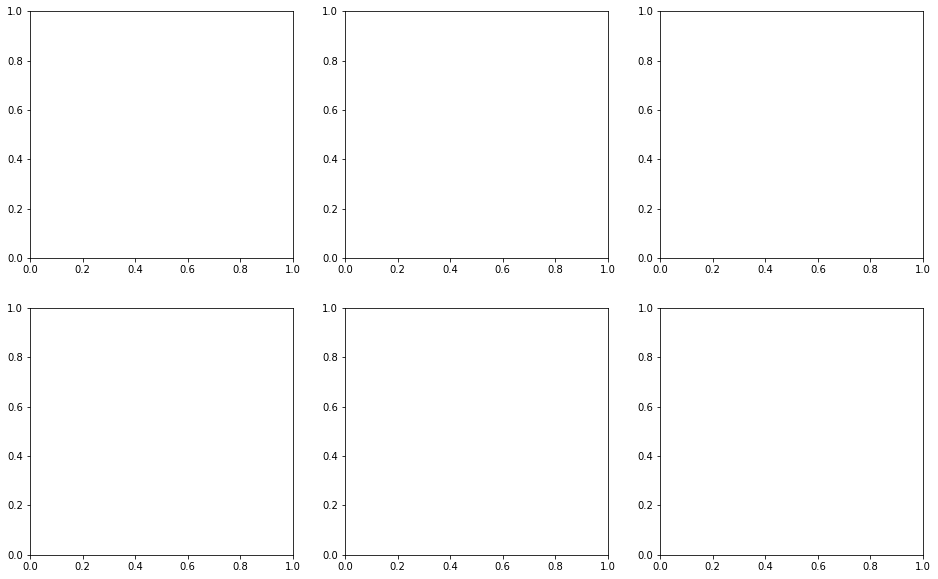

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10));

In [ ]:
cross_no

noroeste,Bueno,Mala,Regular
categoria,,,
CO,366,0,0
No2,366,0,0
O3,362,0,4
Pm10,133,17,216
So2,362,0,4


In [ ]:
ax = sns.barplot(x=cross_ne.index,y=cross_ne['Bueno']+cross_ne['Regular']+cross_ne['Mala'],color = 'red',ax=axes[0,0])
sns.barplot(x=cross_ne.index,y=cross_ne['Bueno']+cross_ne['Regular'],color = 'yellow',ax=axes[0,0])
sns.barplot(x=cross_ne.index,y=cross_ne['Bueno'],color = 'green',ax=axes[0,0])
ax.set_title('Zona Noreste')
ax.set(ylabel = 'Número de días')
ax.set_xticklabels(ax.get_xticklabels(), rotation=5);

In [ ]:
ax2 = sns.barplot(x=cross_so.index,y=cross_so['Bueno']+cross_so['Regular']+cross_so['Mala'],color = 'red',ax=axes[0,1])
sns.barplot(x=cross_so.index,y=cross_so['Bueno']+cross_so['Regular'],color = 'yellow',ax=axes[0,1])
sns.barplot(x=cross_so.index,y=cross_so['Bueno'],color = 'green',ax=axes[0,1])
ax2.set_title('Zona Suroeste')
ax2.set(ylabel = 'Número de días')
ax2.set_xticklabels(ax.get_xticklabels(), rotation=5);

In [ ]:
ax3 = sns.barplot(x=cross_no.index,y=cross_no['Bueno']+cross_no['Regular']+cross_no['Mala'],color = 'red',ax=axes[0,2])
sns.barplot(x=cross_no.index,y=cross_no['Bueno']+cross_no['Regular'],color = 'yellow',ax=axes[0,2])
sns.barplot(x=cross_no.index,y=cross_no['Bueno'],color = 'green',ax=axes[0,2])
ax3.set_title('Zona Noroeste')
ax3.set(ylabel = 'Número de días')
ax3.set_xticklabels(ax.get_xticklabels(), rotation=5);

In [ ]:
ax4 = sns.barplot(x=cross_se.index,y=cross_se['Bueno']+cross_se['Regular']+cross_se['Mala'],color = 'red',ax=axes[1,0])
sns.barplot(x=cross_se.index,y=cross_se['Bueno']+cross_se['Regular'],color = 'yellow',ax=axes[1,0])
sns.barplot(x=cross_se.index,y=cross_se['Bueno'],color = 'green',ax=axes[1,0])
ax4.set_title('Zona Sureste')
ax4.set(ylabel = 'Número de días')
ax4.set_xticklabels(ax.get_xticklabels(), rotation=5);

In [ ]:
ax5 = sns.barplot(x=cross_ce.index,y=cross_ce['Bueno']+cross_ce['Regular']+cross_ce['Mala'],color = 'red',ax=axes[1,2])
sns.barplot(x=cross_ce.index,y=cross_ce['Bueno']+cross_ce['Regular'],color = 'yellow',ax=axes[1,2])
sns.barplot(x=cross_ce.index,y=cross_no['Bueno'],color = 'green',ax=axes[1,2])
ax5.set_title('Zona Centro')
ax5.set(ylabel = 'Número de días')
ax5.set_xticklabels(ax.get_xticklabels(), rotation=5);

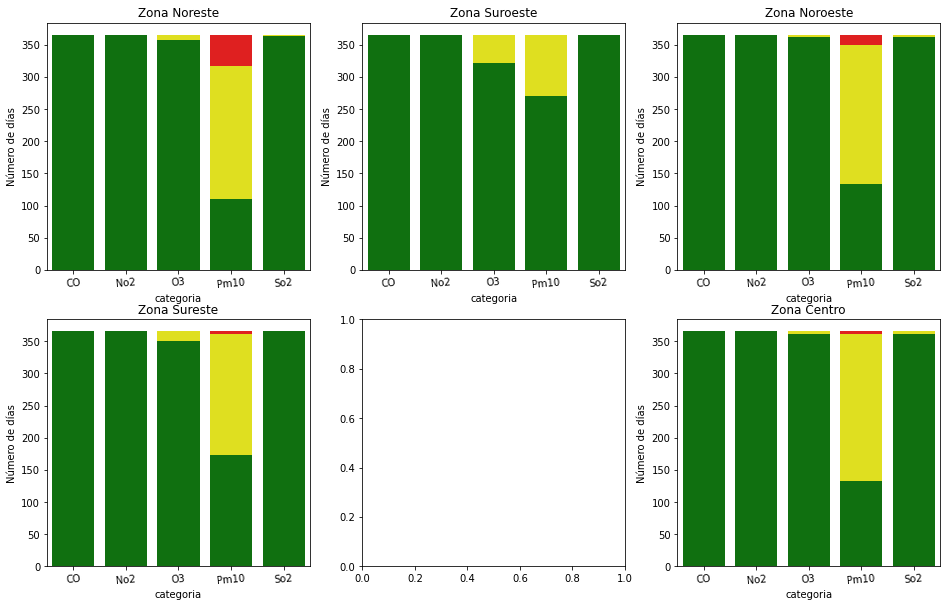

In [ ]:
fig

Como se puede observar, de las 5 zonas, las zonas del norte (noreste y noroeste), presentan las peor calidad del aire en comparación con las otras 3 zonas. Además la zona suroeste es la que prenta una mejor calidad del aire. Gráficas nos muestran de los 366 días que tuvo el año 2020, cuantos de estos tuvieron un índice IMECA, bueno, regular o malo.



Visulización por zonas

In [ ]:
df_Co_cat = df_all_cat[df_all_cat['categoria']=='CO']
df_No2_cat = df_all_cat[df_all_cat['categoria']=='No2']
df_O3_cat = df_all_cat[df_all_cat['categoria']=='O3']
df_Pm10_cat = df_all_cat[df_all_cat['categoria']=='Pm10']
df_So2_cat = df_all_cat[df_all_cat['categoria']=='So2']

In [ ]:
df_Co_redux = pd.DataFrame()
df_No2_redux = pd.DataFrame()
df_O3_redux = pd.DataFrame()
df_Pm10_redux = pd.DataFrame()
df_So2_redux = pd.DataFrame()

In [ ]:
for i in zonas:
  df_Co_redux[i] = pd.Series(df_Co_cat[i].value_counts())
for i in zonas:
  df_No2_redux[i] = pd.Series(df_No2_cat[i].value_counts())
for i in zonas:
  df_O3_redux[i] = pd.Series(df_O3_cat[i].value_counts())
for i in zonas:
  df_Pm10_redux[i] = pd.Series(df_Pm10_cat[i].value_counts())
for i in zonas:
  df_So2_redux[i] = pd.Series(df_So2_cat[i].value_counts())

In [ ]:
df_Co_redux = df_Co_redux.T
df_No2_redux = df_No2_redux.T
df_O3_redux = df_O3_redux.T
df_Pm10_redux = df_Pm10_redux.T
df_So2_redux = df_So2_redux.T

Limpiamos los datos para evitar los datos Nan.

In [ ]:
df_Co_redux.replace(np.nan,0)
df_No2_redux.replace(np.nan,0)
df_O3_redux.replace(np.nan,0)
df_Pm10_redux.replace(np.nan,0)
df_So2_redux.replace(np.nan,0)

,Bueno,Regular
noreste,363.0,3.0
suroeste,366.0,0.0
noroeste,362.0,4.0
sureste,366.0,0.0
centro,365.0,1.0


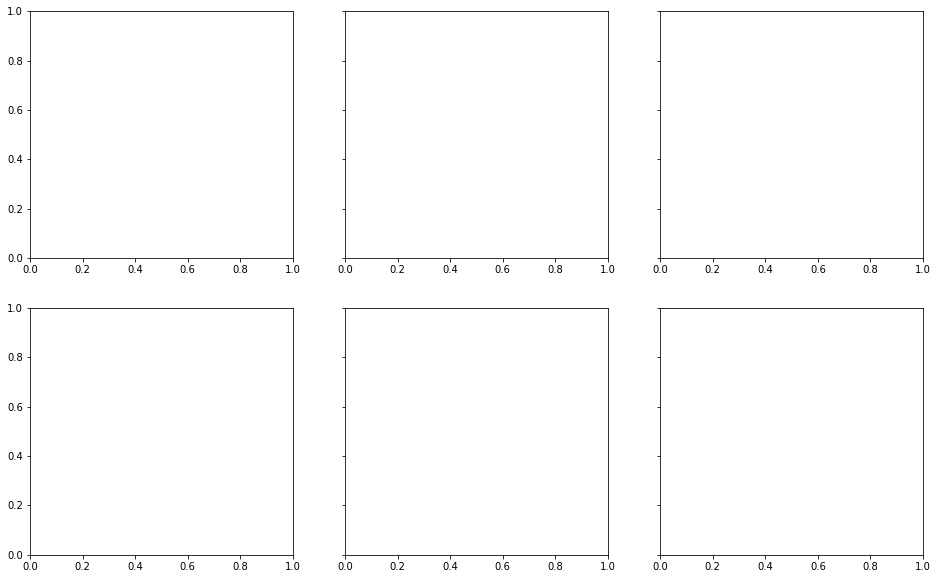

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharey=True);

In [ ]:
ax = sns.barplot(x=df_Co_redux.index,y=df_Co_redux['Bueno'] ,color = 'green',ax=axes[0,0])
ax.set_title('Monóxido + dióxido de carbono')
ax.set(ylabel = 'Número de días')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20);

ax2 = sns.barplot(x=df_No2_redux.index,y=df_No2_redux['Bueno'] ,color = 'green',ax=axes[0,1])
ax2.set_title('Dióxido de nitrógeno')
ax2.set(ylabel = 'Número de días')
ax2.set_xticklabels(ax.get_xticklabels(), rotation=20);

ax3 = sns.barplot(x=df_O3_redux.index,y=df_O3_redux['Bueno']+df_O3_redux['Regular'] ,color = 'yellow',ax=axes[0,2])
ax3 = sns.barplot(x=df_O3_redux.index,y=df_O3_redux['Bueno'] ,color = 'green',ax=axes[0,2])
ax3.set_title('Ozono')
ax3.set(ylabel = 'Número de días')
ax3.set_xticklabels(ax.get_xticklabels(), rotation=20);

ax4 = sns.barplot(x=df_Pm10_redux.index,y=df_Pm10_redux['Bueno']+df_Pm10_redux['Regular']+df_Pm10_redux['Mala']  ,color = 'red',ax=axes[1,0])
ax4 = sns.barplot(x=df_Pm10_redux.index,y=df_Pm10_redux['Bueno']+df_Pm10_redux['Regular'] ,color = 'yellow',ax=axes[1,0])
ax4 = sns.barplot(x=df_Pm10_redux.index,y=df_Pm10_redux['Bueno'] ,color = 'green',ax=axes[1,0])
ax4.set_title('Partículas menores a 10 micras')
ax4.set(ylabel = 'Número de días')
ax4.set_xticklabels(ax.get_xticklabels(), rotation=20);

ax5 = sns.barplot(x=df_So2_redux.index,y=df_So2_redux['Bueno']+df_So2_redux['Regular'] ,color = 'yellow',ax=axes[1,2])
ax5 = sns.barplot(x=df_So2_redux.index,y=df_So2_redux['Bueno'] ,color = 'green',ax=axes[1,2])
ax5.set_title('Dióxido de asufre')
ax5.set(ylabel = 'Número de días')
ax5.set_xticklabels(ax.get_xticklabels(), rotation=20);

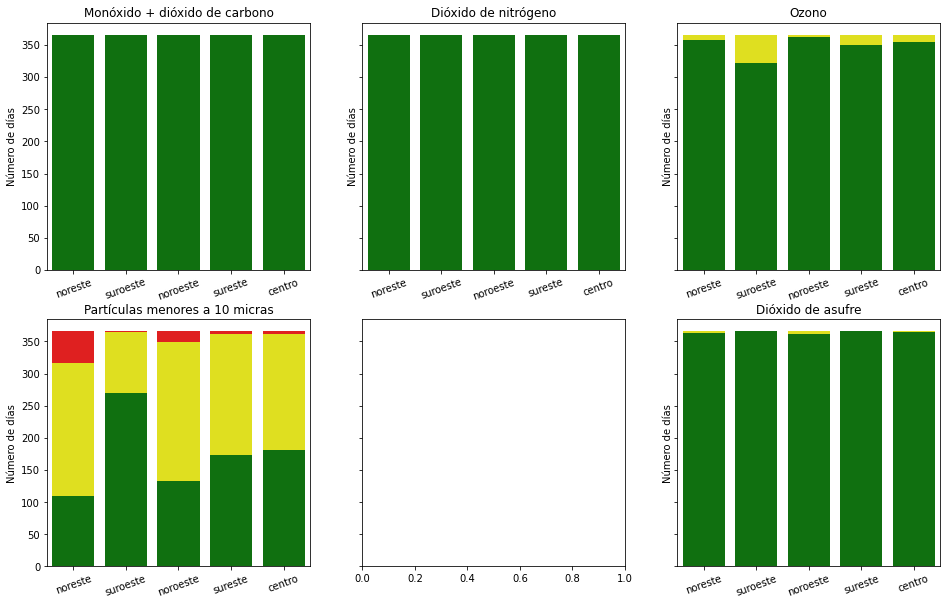

In [ ]:
fig

El monóxido+dióxido de nitrógeno y el dióxido de nitrógeno en promedio diario, presentaron valores buenos de concentración. De igual manera el dióxido de asufre, con muy pocos días de calidad de aire regular. Después le sigue el ozono que presenta peor calidad en el suroeste, siendo aquí la única vez que destaca por mala calidad. Donde se observa las peores concentraciones es en las particulas menores de 10 micras, donde en promedio, se tuvieron varios días con índices malos de calidad de aire.

In [ ]:
df_Co=pd.read_csv(url_1)
df_No2 = pd.read_csv(url_2)
df_O3 = pd.read_csv(url_3)
df_So2 = pd.read_csv(url_4)
df_Pm10 = pd.read_csv(url_5)

In [ ]:
df_Pm10.columns=['hora','NE','SO','SE','CE','NO','categoria']
df_Pm10 = pd.DataFrame(df_Pm10.iloc[:,[1,2,3,4,5]].mean(),columns=['Promedio'])
df_Pm10 = df_Pm10.reset_index()

df_No2.columns=['hora','NE','SO','SE','CE','NO','categoria']
df_No2 = pd.DataFrame(df_No2.iloc[:,[1,2,3,4,5]].mean(),columns=['Promedio'])
df_No2 = df_No2.reset_index()

df_O3.columns=['hora','NE','SO','SE','CE','NO','categoria']
df_O3 = pd.DataFrame(df_O3.iloc[:,[1,2,3,4,5]].mean(),columns=['Promedio'])
df_O3 = df_O3.reset_index()

df_So2.columns=['hora','NE','SO','SE','CE','NO','categoria']
df_So2 = pd.DataFrame(df_So2.iloc[:,[1,2,3,4,5]].mean(),columns=['Promedio'])
df_So2 = df_So2.reset_index()

df_Co.columns=['hora','NE','SO','SE','CE','NO','categoria']
df_Co = pd.DataFrame(df_Co.iloc[:,[1,2,3,4,5]].mean(),columns=['Promedio'])
df_Co = df_Co.reset_index()

In [ ]:
m = folium.Map(location = [19.4325,-99.1330],zoom_start=10, width='100%',height='100%')

folium.Choropleth(
    geo_data=zonas_zmvm,
    name='Monóxido + Dióxido de carbono, promedio anual',
    data=df_Co,
    columns=['index','Promedio'],
    key_on = 'feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.8,
    legend_name='IMECA'
).add_to(m)
m

In [ ]:
m = folium.Map(location = [19.4325,-99.1330],zoom_start=10, width='100%',height='100%')

folium.Choropleth(
    geo_data=zonas_zmvm,
    name='Dióxido de nitrógeno, promedio anual',
    data=df_No2,
    columns=['index','Promedio'],
    key_on = 'feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.8,
    legend_name='IMECA'
).add_to(m)
m

In [ ]:
m = folium.Map(location = [19.4325,-99.1330],zoom_start=10, width='100%',height='100%')

folium.Choropleth(
    geo_data=zonas_zmvm,
    name='Ozono, promedio anual',
    data=df_O3,
    columns=['index','Promedio'],
    key_on = 'feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.8,
    legend_name='IMECA'
).add_to(m)
m

In [ ]:
m = folium.Map(location = [19.4325,-99.1330],zoom_start=10, width='100%',height='100%')

folium.Choropleth(
    geo_data=zonas_zmvm,
    name='Partículas menores a 10 micras, promedio anual',
    data=df_Pm10,
    columns=['index','Promedio'],
    key_on = 'feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.8,
    legend_name='IMECA'
).add_to(m)
m

In [ ]:
m = folium.Map(location = [19.4325,-99.1330],zoom_start=10, width='100%',height='100%')

folium.Choropleth(
    geo_data=zonas_zmvm,
    name='Dióxido de asufre, promedio anual, promedio anual',
    data=df_So2,
    columns=['index','Promedio'],
    key_on = 'feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.8,
    legend_name='IMECA'
).add_to(m)
m